# Implementando Michigrad

## Parte 0 - Introducción

### Objetivos del módulo:
* Entender cual es la función del autograd en el proceso de entrenamiento de redes neuronales
* Entender la importancia de las derivadas para el algorimo de backpropagation
* Entender en lineas generales como funciona un autograd y sus componentes fundamentales 

### Qué es Michigrad y por que es importante?
* Es un motor de cálculo de gradientes automático (autograd) para valores escalares.
* Un autograd es el corazón de las librerías modernas para entrenar redes neuronales.
* Entrenar redes neuronales implica modificar el valor de los pesos W de los perceptrones que componen dicha red. Estos se conocen como los parámetros del modelo. Un modelo de lenguajes como ChatGPT tiene del orden de cientos de miles de millones de pesos/parámetros entrenables.
* Modificar estos pesos al azar sería como tratar de afinar una guitarra o un piano haciendo ajustes al azar en las cuerdas individuales.
* Lo primero que se hace en la práctica es calcular una función de pérdida que nos indique que tan lejos están las respuestas del modelo de las respuestas esperadas. Esta función de pérdida (L) depende de la arquitectura de nuestra red neuronal, pero en última instancia, depende de las entradas y de los pesos W del modelo.
* El autograd permite representar la función L como un grafo de operaciones (técnicamente, un grafo dirigido acíclico), donde cada nodo representa un resultado intermedio en el cálculo de L.
* Esto le permite al autograd, calcular el gradiente de los nodos intermedios mediante el cálculo de las derivadas parciales de cada nodo con respecto al nodo raíz, L. Este gradiente indica que pasa con L si el valor del nodo aumenta o disminuye.
* Aunque el autograd calcula esta información para todos los nodos del grafo de operaciones de L, vamos a estar interesados principalmente en los gradientes de los nodos que representan los pesos W de nuestra red neuronal.
* El proceso de entrenamiento simplemente modifica el valor de los pesos W del modelo en la dirección contraria al gradiente, para minimizar la función de perdida L. 
* Sirve para calcular los gradientes de los nodos de un grafo de operaciones respecto a el nodo raíz. Este nodo raíz representa una función de perdida que indica el desempeño de una red neuronal. Los gradientes de los pesos W brindan información para modificar el valor de dichos pesos para minimizar la función de perdida. Michigrad ayuda a calcular estos gradientes de manera automática.
* Michigrad implementa un algoritmo que se llama **backpropagation** que hace estos cálculos de manera eficiente.
* Para aprender como funciona un motor de cálculo de gradientes, lo mejor es reinventar la rueda e implementar uno propio.
* Michigrad es de juguete y no está pensado para ser usado en producción. Sin embargo, la matemática involucrada no cambia respecto a Autograd (pytorch).
* Uno podría suponer que una librería que implemente un autograd podría llevar algunos miles de lineas de código. Sin embargo el core de Michigrad tiene algo más de 100. 
* Michigrad está fuertemente basado en Micrograd, una autograd con fines pedagógicos creada por Andrej Karpathy.
* Codéa conmigo y reimplementemos Michigrad.

## Parte 1 - Intuición de las derivadas

### Objetivos
* Desarrollar una intuición acerca de las derivadas y la información que brindan.
* Comprender la regla de la cadena y la derivada local.

    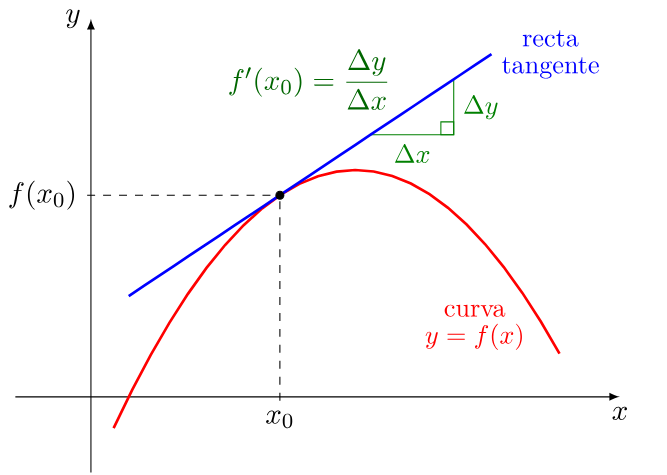
  
    *De Cristian Quinzacara - Trabajo propio, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=104503882*

In [ ]:
# importamos algunas librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parte 2 - La clase Value

### 2.1 - La suma y la multiplicación

### 2.2 - El grafo de operaciones

### 2.3 - La visualización del grafo

### 2.4 - Trackeando los gradientes

## Parte 3 - Haciendo Backpropagation a mano

### 3.1 - Haciendo Backpropagation a mano para una neurona

## Parte 4 - Implementando Backpropagation en Michigrad

### 4.1 - Soporte para tanh

### 4.2 - La función _backward() de las operaciones

### 4.3 - Backpropagation usando _backward

### 4.4 - El sort topológico

### 4.5 - Implementando backward() para toda la expresión

## Conclusión
* El Autograd implementa el algoritmo de backpropagation.
* Para ello construye un grafo de operaciones y registra los gradientes locales a cada módulo.
* El Autograd necesita implementar cada operación y su derivada local para poder propagar esta derivada usando la regla de la cadena.
* El nivel de granularidad de las operaciones del Autograd es una decisión de diseño.
* Si una operación no es diferenciable, entonces no puede implementarse en el autograd.

## Ejercicios

* Implementar la función de activación ReLU (fácil)
    * Pista: seguir la implementación de referencia de Michigrad.
* Implementar la función de activación sigmoide (intermedio)
    * Pista: Usar estas definiciones para la función y su derivada
      $$sigmoid(x) = \frac{1}{1+e^{-x}}$$
      $$sigmoid'(x) = \frac{e^x}{1 + e^x}$$
* Implementar la potencia para Values (difícil)
    * Pista: Debe funcionar para `Value(3) ** Value(2)` o para expresiones del estilo `Value(3) ** (Value(5) + 2)`